In [1]:
%pip install seaborn
%pip install wordcloud
%pip install spacy
%pip install textstat

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [6]:
import pandas as pd

# File paths for the datasets (one per CEFR level)
file_paths = [
    "./Data/CEFR_A1_sentences_treated.csv",
    "./Data/CEFR_A2_sentences_treated.csv",
    "./Data/CEFR_B1_sentences_treated.csv",
    "./Data/CEFR_B2_sentences_treated.csv",
    "./Data/CEFR_C1_sentences_treated.csv",
    "./Data/CEFR_C2_sentences_treated.csv",
]

# Load all datasets and merge them into one
datasets = [pd.read_csv(file_path) for file_path in file_paths]
merged_data = pd.concat(datasets, ignore_index=True)

# Remove rows where difficulty is not in the specified levels
valid_difficulties = ["A1", "A2", "B1", "B2", "C1", "C2"]
merged_data = merged_data[merged_data["difficulty"].isin(valid_difficulties)]

# Display the count of sentences per difficulty level before balancing
print("Counts per difficulty level before balancing:")
print(merged_data["difficulty"].value_counts())

# Find the minimum value count across all difficulty levels
min_count = merged_data["difficulty"].value_counts().min()

# Balance the dataset by sampling the minimum value count for each difficulty level
balanced_data = (
    merged_data.groupby("difficulty")
    .apply(lambda x: x.sample(n=min_count, random_state=42))
    .reset_index(drop=True)
)

# Display the count of sentences per difficulty level after balancing
print("\nCounts per difficulty level after balancing:")
print(balanced_data["difficulty"].value_counts())

# Add a column for sentence length
balanced_data["sentence_length"] = balanced_data["sentence"].apply(lambda x: len(x.split()))

# Display a sample of the processed dataset
print("\nSample of the processed data:")
print(balanced_data.sample(30))

Counts per difficulty level before balancing:
difficulty
B2    1842
A2    1389
B1    1101
A1     913
C1     803
C2     543
Name: count, dtype: int64

Counts per difficulty level after balancing:
difficulty
A1    543
A2    543
B1    543
B2    543
C1    543
C2    543
Name: count, dtype: int64

Sample of the processed data:
                                               sentence difficulty  \
3029  Das Fehlen einer Kultur der Rückmeldung verwei...         C2   
2823  Das Studium gliedert sich in die vier Bereiche...         C2   
1656  Die neuen modernen Moscheen hier in Dänemark, ...         B2   
348                                            Oh nein!         A1   
1513  Ich liebe die Nordsee, denn ich kann die Schif...         B1   
1487                       Das ist nicht immer einfach.         B1   
91                            Die Stadt ist sehr schön.         A1   
590        Es ist das Fest der Liebe und der Geschenke.         A2   
47                                   Sie ist se

/var/folders/wb/btfl8bv91b5c253kbpftk1940000gn/T/ipykernel_39735/2883094558.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby("difficulty")


In [7]:
# Save the processed dataset to a CSV file
output_file = "./data/combined_balanced_CEFR_sentences.csv"
balanced_data.to_csv(output_file, index=False)
print(f"\nBalanced dataset saved to '{output_file}'.")


Balanced dataset saved to './data/combined_balanced_CEFR_sentences.csv'.


In [8]:
data = balanced_data

## 1.1 Basic Statistics

#### Class Distribution:

Check how sentences are distributed across CEFR levels (you already did this).

<Axes: title={'center': 'Class Distribution'}, xlabel='difficulty'>

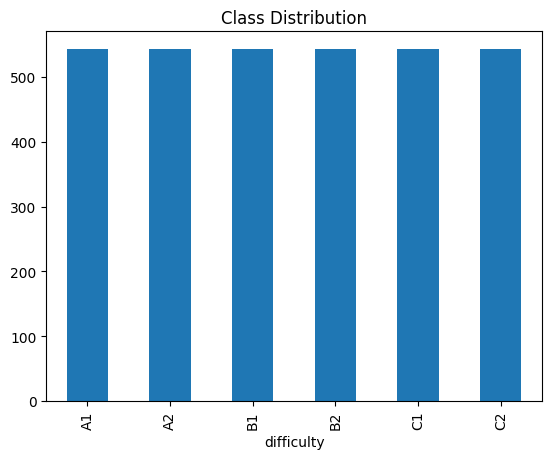

In [9]:
data["difficulty"].value_counts().plot(kind="bar", title="Class Distribution")


#### Sentence Length:

Analyze the average sentence length (in words) per CEFR level.


            count       mean        std  min   25%   50%   75%   max
difficulty                                                          
A1          543.0   5.732965   2.484743  2.0   4.0   5.0   7.0  20.0
A2          543.0   7.639042   3.273863  2.0   5.0   7.0   9.0  27.0
B1          543.0  10.526703   4.347745  3.0   7.0  10.0  13.0  40.0
B2          543.0  14.513812   6.166157  4.0  10.0  14.0  18.0  44.0
C1          543.0  20.000000   9.643459  5.0  13.0  18.0  25.0  61.0
C2          543.0  22.062615  10.541420  5.0  15.0  20.0  26.0  86.0


<Axes: xlabel='sentence_length', ylabel='Count'>

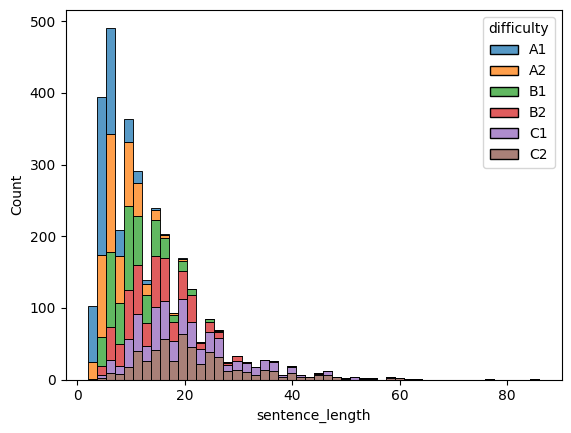

In [11]:
import pandas as pd
import seaborn as sns

sentence_length_stats = data.groupby("difficulty")["sentence_length"].describe()
print(sentence_length_stats)

# Plot the distribution of sentence lengths by difficulty
sns.histplot(data=data, x="sentence_length", hue="difficulty", bins=50, multiple="stack")

#### Word Count Distribution:

Visualize the distribution of sentence lengths for each CEFR level.

<Axes: xlabel='difficulty', ylabel='sentence_length'>

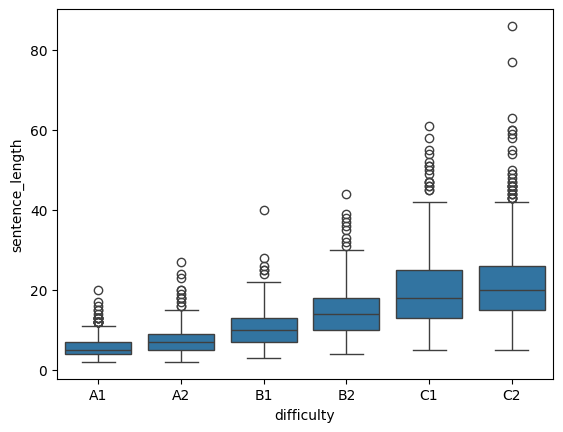

In [12]:
import seaborn as sns
sns.boxplot(data=data, x="difficulty", y="sentence_length")


## 1.2 Lexical diversity

#### Unique Word Count:

Count unique words per CEFR level.

In [13]:
from collections import Counter

data["unique_words"] = data["sentence"].apply(lambda x: len(set(x.split())))
unique_word_stats = data.groupby("difficulty")["unique_words"].mean()
print(unique_word_stats)


difficulty
A1     5.646409
A2     7.530387
B1    10.300184
B2    14.040516
C1    18.832413
C2    20.666667
Name: unique_words, dtype: float64


#### Word Cloud:

Generate a word cloud for each CEFR level to visualize the most frequent words.

In [14]:
import subprocess

# Download SpaCy German language model
subprocess.run(["python3", "-m", "spacy", "download", "de_core_news_sm"])


/Users/dimitriroulin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


CompletedProcess(args=['python3', '-m', 'spacy', 'download', 'de_core_news_sm'], returncode=0)

/Users/dimitriroulin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package names to
[nltk_data]     /Users/dimitriroulin/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dimitriroulin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


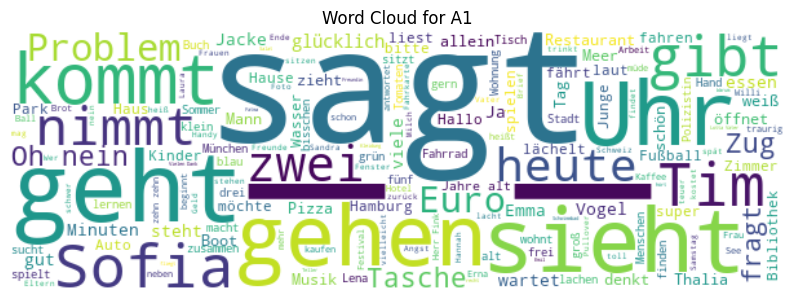

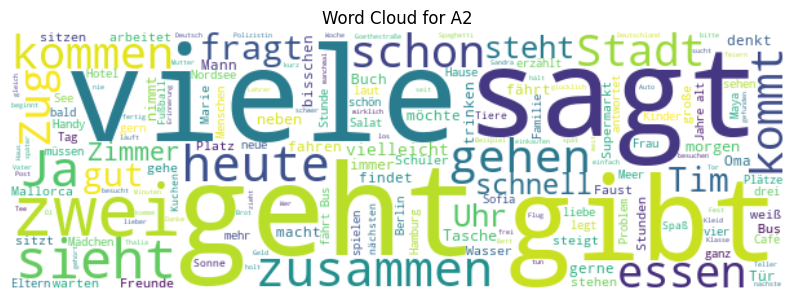

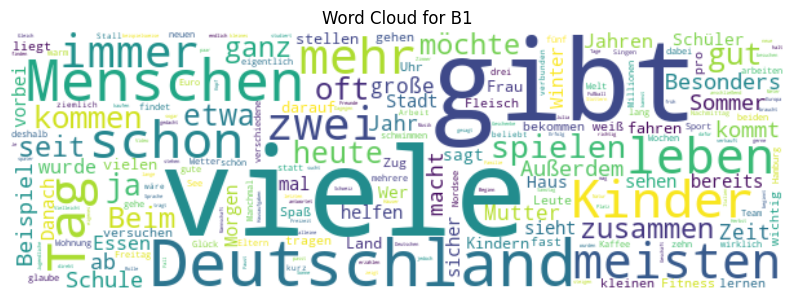

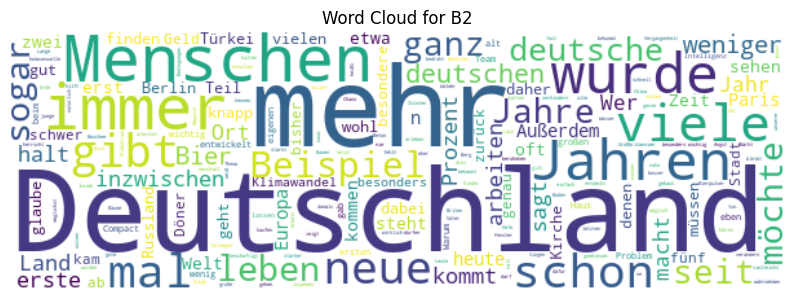

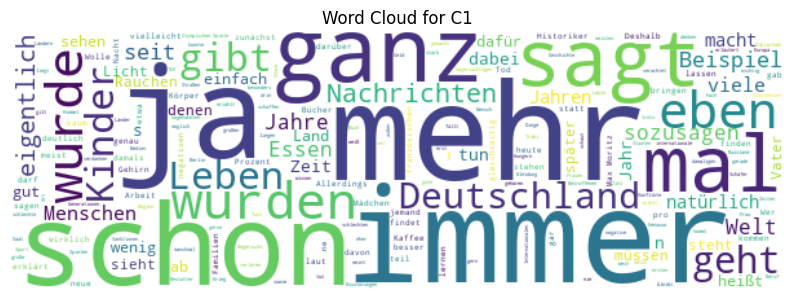

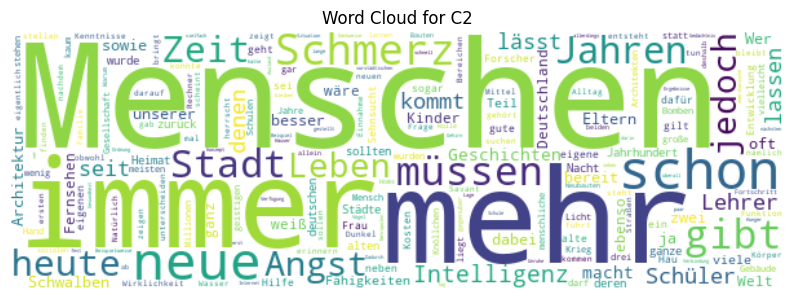

In [15]:
import spacy
from nltk.corpus import names, stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download("names")
nltk.download("stopwords")

# Define stopwords and common names
common_names = set(names.words())  # English names
german_stop_words = set(stopwords.words("german"))  # German stopwords

# Load SpaCy German language model
nlp = spacy.load("de_core_news_sm")

for level in data["difficulty"].unique():
    sentences = data[data["difficulty"] == level]["sentence"]
    text = " ".join(sentences)

    # Use NER and filtering
    doc = nlp(text)
    filtered_text = " ".join(
        token.text for token in doc
        if token.ent_type_ != "PER"  # Remove names
        and token.text.lower() not in common_names  # Remove common names
        and token.text.lower() not in german_stop_words  # Remove German stopwords
    )
    
    # Generate word cloud
    wordcloud = WordCloud(width=600, height=200, background_color="white").generate(filtered_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {level}")
    plt.show()


## 1.3 Common Words and N-grams

#### Most Frequent Words:

Find the most common words per CEFR level.

In [16]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")
german_stop_words = stopwords.words("german")

for level in data["difficulty"].unique():
    sentences = data[data["difficulty"] == level]["sentence"]
    vectorizer = CountVectorizer(max_features=10, stop_words=german_stop_words)
    word_counts = vectorizer.fit_transform(sentences).sum(axis=0).tolist()[0]
    print(f"Top words for {level}: {vectorizer.get_feature_names_out()}")


Top words for A1: ['anna' 'gehen' 'geht' 'kommt' 'nein' 'oh' 'sagt' 'sieht' 'sofia' 'uhr']
Top words for A2: ['gehen' 'geht' 'gibt' 'heute' 'ja' 'kommen' 'sagt' 'sieht' 'viele' 'zwei']
Top words for B1: ['deutschland' 'gibt' 'kinder' 'leben' 'mehr' 'menschen' 'schon' 'spielen'
 'tag' 'viele']
Top words for B2: ['deutschland' 'gibt' 'immer' 'jahren' 'mal' 'mehr' 'menschen' 'schon'
 'viele' 'wurde']
Top words for C1: ['ganz' 'immer' 'ja' 'leben' 'mal' 'mehr' 'sagt' 'schon' 'wurde' 'wurden']
Top words for C2: ['gibt' 'immer' 'jahren' 'mehr' 'menschen' 'müssen' 'neue' 'schmerz'
 'schon' 'stadt']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dimitriroulin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.3 N-grams Analysis:

Explore common bigrams or trigrams.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    ngram_range=(2, 3), 
    max_features=10, 
    stop_words=german_stop_words
)
ngrams = vectorizer.fit_transform(data["sentence"])
print(f"Top N-grams: {vectorizer.get_feature_names_out()}")


Top N-grams: ['de coubertin' 'ersten mal' 'fünf minuten' 'gibt viele' 'immer mehr'
 'jahre alt' 'max moritz' 'oh nein' 'schon seit' 'viele menschen']


## 1.4. Sentence Complexity

#### POS Tags Analysis:

Check the complexity of sentences by analyzing parts of speech (POS) tags.

In [19]:
%pip install spacy
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:

import nltk
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


# Download stop words
nltk.download("stopwords")
german_stop_words = stopwords.words("german")

for level in data["difficulty"].unique():
    sentences = data[data["difficulty"] == level]["sentence"]
    vectorizer = CountVectorizer(max_features=10, stop_words=german_stop_words)
    word_counts = vectorizer.fit_transform(sentences).sum(axis=0).tolist()[0]
    print(f"Top words for {level}: {vectorizer.get_feature_names_out()}")

Top words for A1: ['anna' 'gehen' 'geht' 'kommt' 'nein' 'oh' 'sagt' 'sieht' 'sofia' 'uhr']
Top words for A2: ['gehen' 'geht' 'gibt' 'heute' 'ja' 'kommen' 'sagt' 'sieht' 'viele' 'zwei']
Top words for B1: ['deutschland' 'gibt' 'kinder' 'leben' 'mehr' 'menschen' 'schon' 'spielen'
 'tag' 'viele']
Top words for B2: ['deutschland' 'gibt' 'immer' 'jahren' 'mal' 'mehr' 'menschen' 'schon'
 'viele' 'wurde']
Top words for C1: ['ganz' 'immer' 'ja' 'leben' 'mal' 'mehr' 'sagt' 'schon' 'wurde' 'wurden']
Top words for C2: ['gibt' 'immer' 'jahren' 'mehr' 'menschen' 'müssen' 'neue' 'schmerz'
 'schon' 'stadt']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dimitriroulin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Readability Score:

Measure readability using metrics like the Flesch Reading Ease (adapted for German).

In [39]:
from textstat import flesch_reading_ease

data["readability"] = data["sentence"].apply(flesch_reading_ease)
readability_stats = data.groupby("difficulty")["readability"].mean()
print(readability_stats)

difficulty
A1    97.861565
A2    93.748214
B1    82.109705
B2    70.595212
C1    61.693149
C2    55.638785
Name: readability, dtype: float64


## 1.5. Word Overlap Across Levels


#### Vocabulary Overlap:

Check how much overlap exists in the vocabulary between CEFR levels.

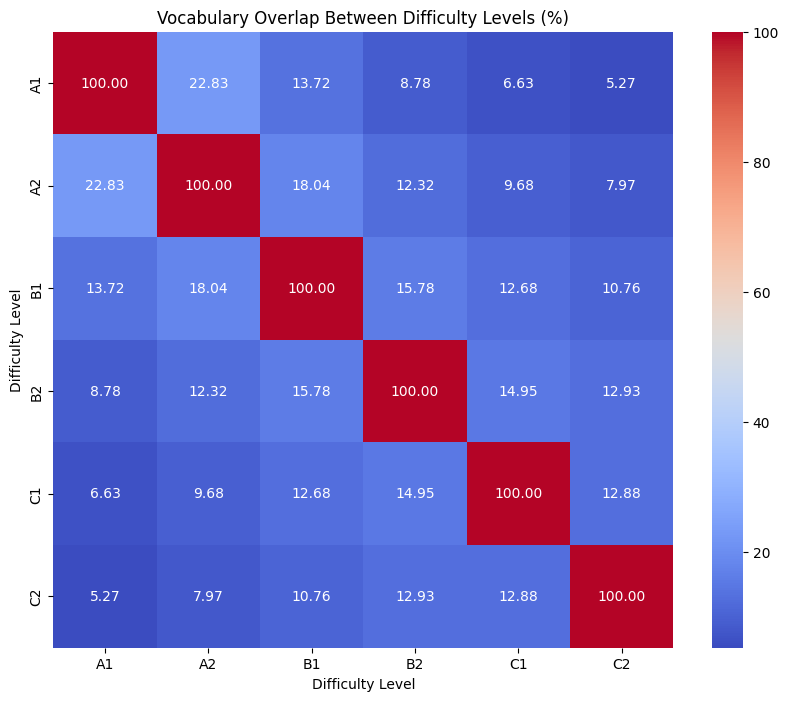

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get vocabulary from sentences
def get_vocab(sentences):
    return set(" ".join(sentences).split())

# Create vocabulary sets for each difficulty level
vocab_levels = {
    level: get_vocab(data[data["difficulty"] == level]["sentence"])
    for level in data["difficulty"].unique()
}

# Initialize a DataFrame to store overlap percentages
levels = list(vocab_levels.keys())
overlap_matrix = pd.DataFrame(index=levels, columns=levels, dtype=float)

# Calculate vocabulary overlaps
for level1, vocab1 in vocab_levels.items():
    for level2, vocab2 in vocab_levels.items():
        overlap = len(vocab1 & vocab2) / len(vocab1 | vocab2) * 100
        overlap_matrix.loc[level1, level2] = overlap

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Vocabulary Overlap Between Difficulty Levels (%)")
plt.xlabel("Difficulty Level")
plt.ylabel("Difficulty Level")
plt.show()
